In [57]:
import numpy as np 
import pandas as pd 
import plotly
import plotly.graph_objs as go
import seaborn as sns


In [13]:
eq=pd.read_csv('/content/russia_losses_equipment.csv')

In [14]:
pe=pd.read_csv('/content/russia_losses_personnel.csv')

In [15]:
eq.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


In [16]:
eq.shape

(54, 15)

In [17]:
pe.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [18]:
eq.isnull().sum()

date                      0
day                       0
aircraft                  0
helicopter                0
tank                      0
APC                       0
field artillery           0
MRL                       0
military auto             0
fuel tank                 0
drone                     0
naval ship                0
anti-aircraft warfare     0
special equipment        19
mobile SRBM system       29
dtype: int64

In [19]:
eq.dropna()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
29,2022-03-26,31,117,127,575,1640,293,91,1131,73,56,7,51,19.0,2.0
30,2022-03-27,32,121,127,582,1664,294,93,1144,73,56,7,52,21.0,4.0
31,2022-03-28,33,123,127,586,1694,302,95,1150,73,66,7,54,21.0,4.0
32,2022-03-29,34,127,129,597,1710,303,96,1178,73,71,7,54,21.0,4.0
33,2022-03-30,35,131,131,605,1723,305,96,1184,75,81,7,54,21.0,4.0
34,2022-03-31,36,135,131,614,1735,311,96,1201,75,83,7,54,22.0,4.0
35,2022-04-01,37,143,131,625,1751,316,96,1220,76,85,7,54,24.0,4.0
36,2022-04-02,38,143,134,631,1776,317,100,1236,76,87,7,54,24.0,4.0
37,2022-04-03,39,143,134,644,1830,325,105,1249,76,89,7,54,24.0,4.0
38,2022-04-04,40,147,134,647,1844,330,107,1273,76,91,7,54,25.0,4.0


In [20]:
eq.dropna(inplace=True)

In [21]:
eq.shape

(25, 15)

In [22]:
pe.shape

(54, 5)

In [23]:
pe.isnull().sum()

date          0
day           0
personnel     0
personnel*    0
POW           0
dtype: int64

In [24]:
eq.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00
mean,43.000000,147.560000,136.520000,684.920000,1861.560000,336.080000,108.640000,1323.640000,75.440000,105.800000,7.200000,57.720000,24.160000,3.92
std,7.359801,14.759404,6.684061,70.225185,121.341488,27.673573,12.065377,118.044088,1.121011,29.831471,0.408248,5.496362,2.115026,0.40
min,31.000000,117.000000,127.000000,575.000000,1640.000000,293.000000,91.000000,1131.000000,73.000000,56.000000,7.000000,51.000000,19.000000,2.00
25%,37.000000,143.000000,131.000000,625.000000,1751.000000,316.000000,96.000000,1220.000000,76.000000,85.000000,7.000000,54.000000,24.000000,4.00
50%,43.000000,150.000000,135.000000,698.000000,1891.000000,332.000000,108.000000,1358.000000,76.000000,111.000000,7.000000,55.000000,25.000000,4.00
75%,49.000000,158.000000,143.000000,739.000000,1964.000000,358.000000,115.000000,1429.000000,76.000000,132.000000,7.000000,64.000000,25.000000,4.00
max,55.000000,169.000000,150.000000,802.000000,2063.000000,386.000000,132.000000,1495.000000,76.000000,158.000000,8.000000,67.000000,27.000000,4.00


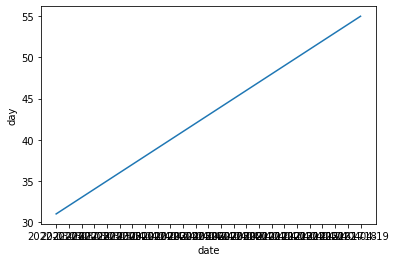

In [37]:
sns.lineplot(x='date',y='day',data=eq)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



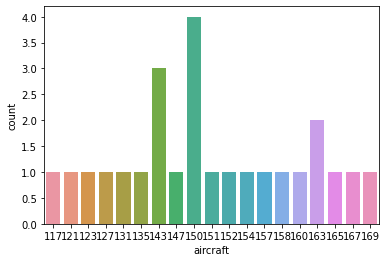

In [45]:
sns.countplot(eq['aircraft'],label="Count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



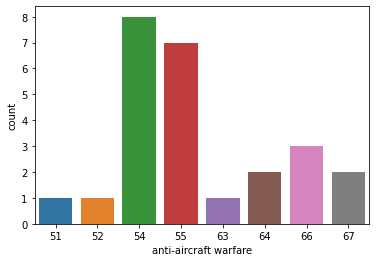

In [46]:
sns.countplot(eq['anti-aircraft warfare'],label="count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



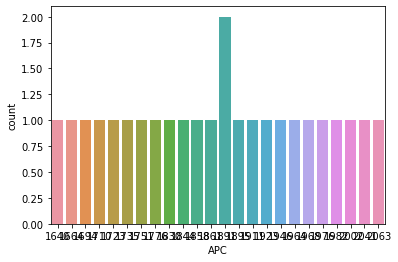

In [47]:
sns.countplot(eq['APC'],label="count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



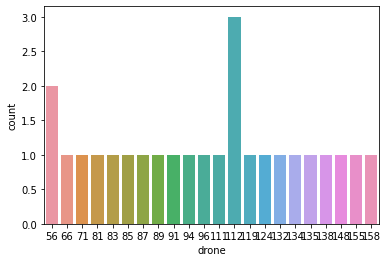

In [48]:
sns.countplot(eq['drone'],label="count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



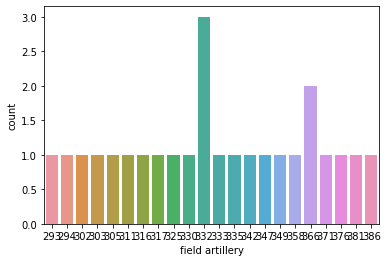

In [49]:
sns.countplot(eq['field artillery'],label="Count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



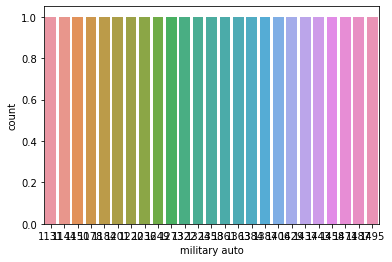

In [50]:
sns.countplot(eq['military auto'],label="Count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



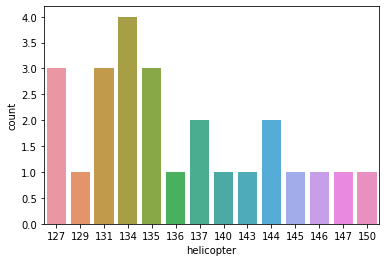

In [51]:
sns.countplot(eq['helicopter'],label="Count")

In [53]:
eq.iloc[:,:].corr()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
day,1.000000,0.968918,0.975742,0.996433,0.989634,0.990359,0.970828,0.992914,0.712085,0.991975,0.693375,0.888911,0.896710,0.339683
aircraft,0.968918,1.000000,0.940470,0.966415,0.979919,0.962275,0.931484,0.971416,0.845751,0.961931,0.616823,0.818674,0.960709,0.431363
helicopter,0.975742,0.940470,1.000000,0.963844,0.958255,0.987754,0.979945,0.953230,0.663294,0.978291,0.754312,0.939808,0.848603,0.296726
tank,0.996433,0.966415,0.963844,1.000000,0.990908,0.982612,0.962785,0.996970,0.714465,0.986764,0.666218,0.865694,0.898629,0.326094
APC,0.989634,0.979919,0.958255,0.990908,1.000000,0.979998,0.961416,0.991670,0.759614,0.981361,0.636051,0.847339,0.928790,0.380400
field artillery,0.990359,0.962275,0.987754,0.982612,0.979998,1.000000,0.988308,0.975216,0.689180,0.985078,0.736139,0.914550,0.889624,0.324317
MRL,0.970828,0.931484,0.979945,0.962785,0.961416,0.988308,1.000000,0.952719,0.628323,0.966883,0.785003,0.915746,0.864468,0.304591
military auto,0.992914,0.971416,0.953230,0.996970,0.991670,0.975216,0.952719,1.000000,0.735844,0.981304,0.636180,0.851778,0.908286,0.339986
fuel tank,0.712085,0.845751,0.663294,0.714465,0.759614,0.689180,0.628323,0.735844,1.000000,0.710446,0.254925,0.453624,0.865329,0.453460
drone,0.991975,0.961931,0.978291,0.986764,0.981361,0.985078,0.966883,0.981304,0.710446,1.000000,0.701364,0.897958,0.884786,0.347787


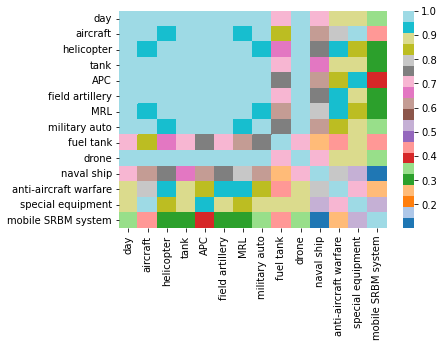

In [54]:
sns.heatmap(eq.iloc[:,:].corr(),cmap="tab20")

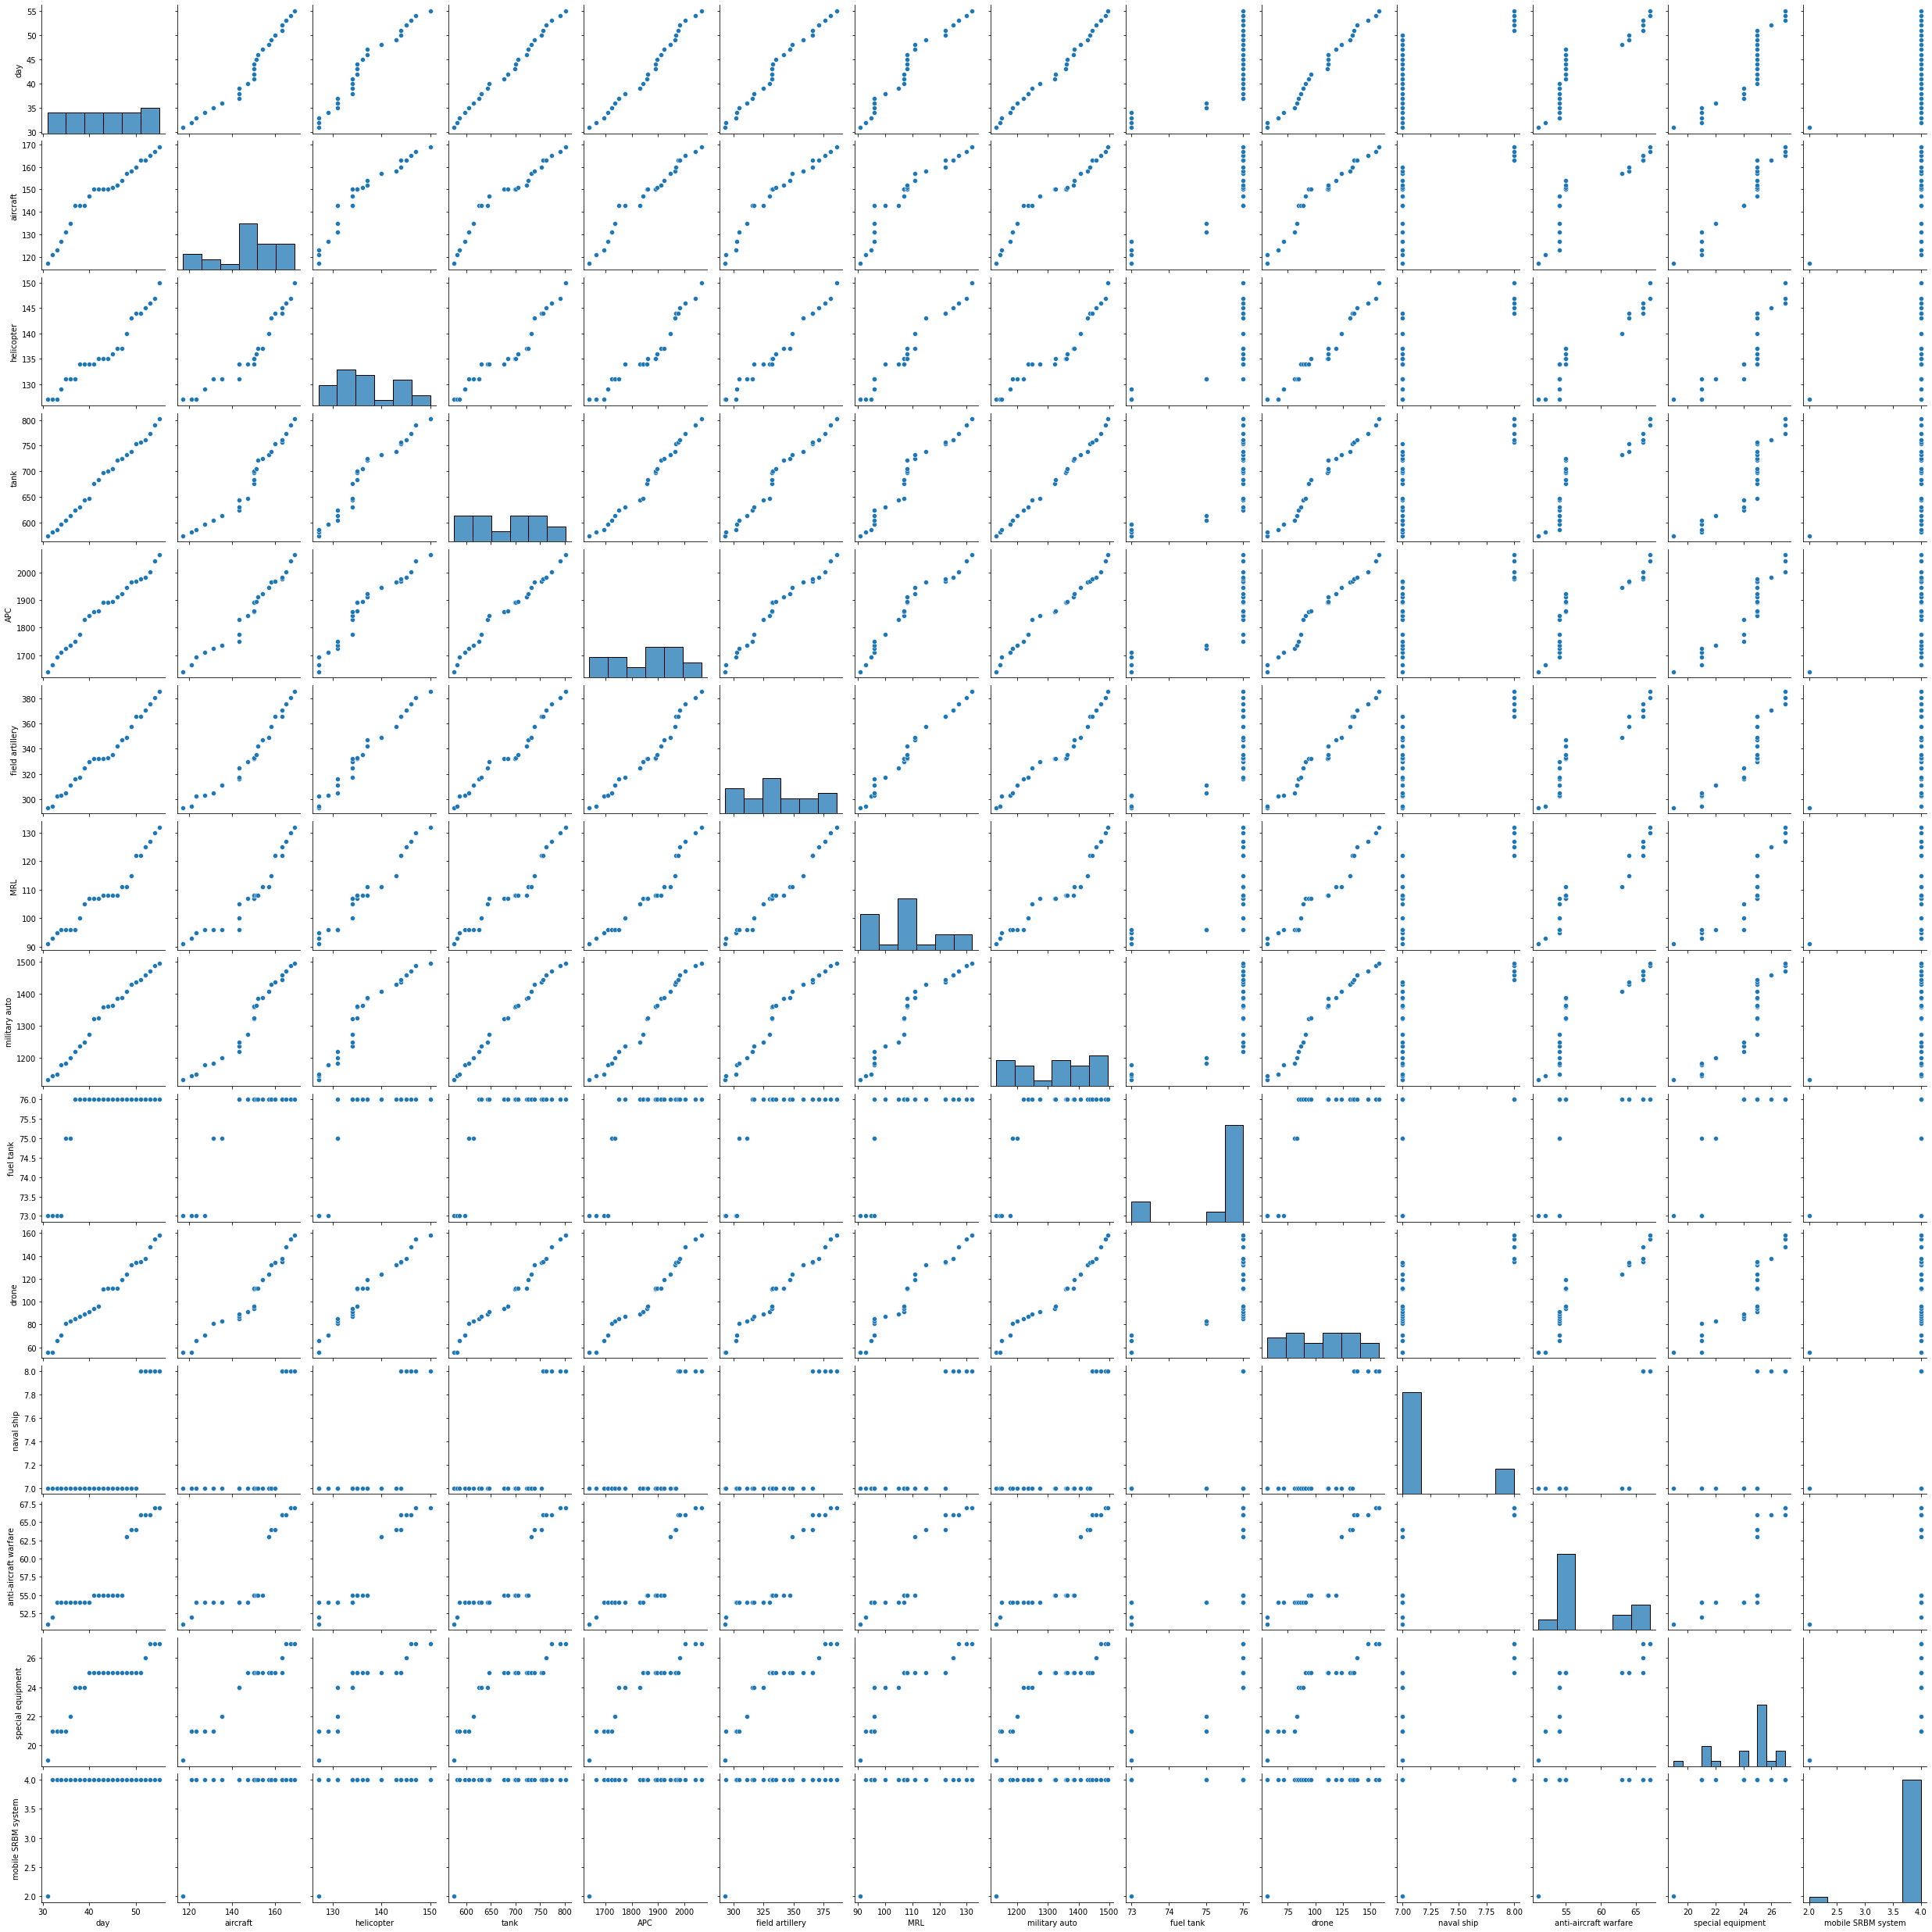

In [56]:
sns.pairplot(eq)

In [31]:
x = eq['date']
y0 = eq['aircraft']
y1 = eq['helicopter']
y2 = eq['anti-aircraft warfare']
y3 = eq['drone']
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y0,
                    mode='lines+markers',
                    name='Aircraft'))
fig.add_trace(go.Scatter(x=x, y=y1,
                    mode='lines+markers',
                    name='Helicopter'))
fig.add_trace(go.Scatter(x=x, y=y2,
                    mode='lines+markers',
                    name='Anti-aircraft warfare'))
fig.add_trace(go.Scatter(x=x, y=y3,
                    mode='lines+markers',
                    name='Drone'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title="Weapons: Air",
                  xaxis_title="Date",
                  yaxis_title="Weapons ",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [35]:
x = eq['date']
y0 = eq['tank']
y1 = eq['APC']
y2 = eq['field artillery']
y3 = eq['military auto']
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y0,
                    mode='lines+markers',
                    name='military auto'))
fig.add_trace(go.Scatter(x=x, y=y1,
                    mode='lines+markers',
                    name='field artillery'))
fig.add_trace(go.Scatter(x=x, y=y2,
                    mode='lines+markers',
                    name='APC'))
fig.add_trace(go.Scatter(x=x, y=y3,
                    mode='lines+markers',
                    name='tank'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title="Weapons: Ground",
                  xaxis_title="Date",
                  yaxis_title="Weapons ",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [36]:
x = eq['date']
y0 = eq['tank']
y1 = eq['APC']
y2 = eq['field artillery']
y3 = eq['military auto']
y4 = eq['aircraft']
y5 = eq['helicopter']
y6 = eq['anti-aircraft warfare']
y7 = eq['drone']
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y0,
                    mode='lines+markers',
                    name='Aircraft'))
fig.add_trace(go.Scatter(x=x, y=y1,
                    mode='lines+markers',
                    name='Helicopter'))
fig.add_trace(go.Scatter(x=x, y=y2,
                    mode='lines+markers',
                    name='Anti-aircraft warfare'))
fig.add_trace(go.Scatter(x=x, y=y3,
                    mode='lines+markers',
                    name='Drone'))
fig.add_trace(go.Scatter(x=x, y=y0,
                    mode='lines+markers',
                    name='military auto'))
fig.add_trace(go.Scatter(x=x, y=y1,
                    mode='lines+markers',
                    name='field artillery'))
fig.add_trace(go.Scatter(x=x, y=y2,
                    mode='lines+markers',
                    name='APC'))
fig.add_trace(go.Scatter(x=x, y=y3,
                    mode='lines+markers',
                    name='tank'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title="Weapons:Air & Ground",
                  xaxis_title="Date",
                  yaxis_title="Weapons ",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [34]:
x, y = pe['date'], pe['personnel']
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines+markers',
                    name='lines+markers'))

fig.show()